<a href="https://colab.research.google.com/github/Bluelord/ML_Mastery_Python/blob/main/11_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing ML Algorithms**

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


WE often end up with multiple models for our dataset, each have different performance characteristics, using the resamplaning methods like cross-valdaation we can estimate how accurate our model is for unseen data. We campare our model by visulizing the model accuracy with its average accuracy, varience and other statistical values of its accuracy.

## Compare ML Algorithms Consistently



In [6]:
# Camparing Algorithms 
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load Data
filename = "/content/drive/MyDrive/Colab Notebooks/ML Mastery python/Dataset/pima-indians-diabetes.csv"
names = ['preg', 'plas','pres','skin','test','mass','pedi','age','class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input & output 
X = array[:,0:8]
Y = array[:,8]
# Prepare Models 
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "% s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.699094 (0.060631)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


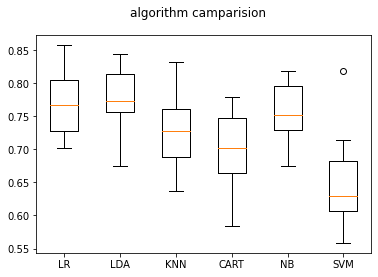

In [7]:
# Boxplot for algorithm camparision
fig = plt.figure()
fig.suptitle('algorithm camparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()